In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employeedataset/employee_engagement_survey_data.csv
/kaggle/input/employeedataset/training_and_development_data.csv
/kaggle/input/employeedataset/employee_data.csv
/kaggle/input/employeedataset/recruitment_data.csv


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
employee_data = pd.read_csv('/kaggle/input/employeedataset/employee_data.csv')
survey_data = pd.read_csv('/kaggle/input/employeedataset/employee_engagement_survey_data.csv')
recruitment_data = pd.read_csv('/kaggle/input/employeedataset/recruitment_data.csv')
training_data = pd.read_csv('/kaggle/input/employeedataset/training_and_development_data.csv')

In [4]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   StartDate                   3000 non-null   object
 4   ExitDate                    1533 non-null   object
 5   Title                       3000 non-null   object
 6   Supervisor                  3000 non-null   object
 7   ADEmail                     3000 non-null   object
 8   BusinessUnit                3000 non-null   object
 9   EmployeeStatus              3000 non-null   object
 10  EmployeeType                3000 non-null   object
 11  PayZone                     3000 non-null   object
 12  EmployeeClassificationType  3000 non-null   object
 13  TerminationType             3000 non-null   obje

In [7]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all 'TerminationDescription' values into a single string
text = ' '.join(employee_data['TerminationDescription'].dropna())

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=['Nan']).generate(text)

# Display the word cloud visualization
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [8]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Employee ID              3000 non-null   int64 
 1   Survey Date              3000 non-null   object
 2   Engagement Score         3000 non-null   int64 
 3   Satisfaction Score       3000 non-null   int64 
 4   Work-Life Balance Score  3000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 117.3+ KB


In [9]:
recruitment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Applicant ID         3000 non-null   int64  
 1   Application Date     3000 non-null   object 
 2   First Name           3000 non-null   object 
 3   Last Name            3000 non-null   object 
 4   Gender               3000 non-null   object 
 5   Date of Birth        3000 non-null   object 
 6   Phone Number         3000 non-null   object 
 7   Email                3000 non-null   object 
 8   Address              3000 non-null   object 
 9   City                 3000 non-null   object 
 10  State                3000 non-null   object 
 11  Zip Code             3000 non-null   int64  
 12  Country              3000 non-null   object 
 13  Education Level      3000 non-null   object 
 14  Years of Experience  3000 non-null   int64  
 15  Desired Salary       3000 non-null   f

In [10]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              3000 non-null   int64  
 1   Training Date            3000 non-null   object 
 2   Training Program Name    3000 non-null   object 
 3   Training Type            3000 non-null   object 
 4   Training Outcome         3000 non-null   object 
 5   Location                 3000 non-null   object 
 6   Trainer                  3000 non-null   object 
 7   Training Duration(Days)  3000 non-null   int64  
 8   Training Cost            3000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 211.1+ KB


In [11]:
# Create dataframes from the sample data
employee_df = pd.DataFrame(employee_data)
survey_df = pd.DataFrame(survey_data)
recruitment_df = pd.DataFrame(recruitment_data)
training_df = pd.DataFrame(training_data)

In [12]:
# Perform case-insensitive left joins using merge
merged_df = employee_df.merge(survey_df, left_on='EmpID', right_on='Employee ID', how='left', suffixes=('', '_survey'))
merged_df = merged_df.merge(recruitment_df, left_on='EmpID', right_on='Applicant ID', how='left', suffixes=('', '_recruitment'))
merged_df = merged_df.merge(training_df, left_on='EmpID', right_on='Employee ID', how='left', suffixes=('', '_training'))
print(merged_df)

      EmpID FirstName    LastName  StartDate   ExitDate  \
0      3427     Uriah     Bridges  20-Sep-19        NaN   
1      3428     Paula       Small  11-Feb-23        NaN   
2      3429    Edward        Buck  10-Dec-18        NaN   
3      3430   Michael     Riordan  21-Jun-21        NaN   
4      3431   Jasmine       Onque  29-Jun-19        NaN   
...     ...       ...         ...        ...        ...   
2995   3422    Jakobe    Erickson  22-Jun-22  07-Aug-22   
2996   3423    Adyson  Strickland  28-Dec-20        NaN   
2997   3424   Annabel     Wilkins  09-Dec-20  04-Aug-22   
2998   3425    Kendra       Braun  28-May-19  23-Oct-21   
2999   3426     Chace        Kerr  27-Apr-22        NaN   

                        Title          Supervisor  \
0     Production Technician I        Peter Oneill   
1     Production Technician I     Renee Mccormick   
2          Area Sales Manager      Crystal Walker   
3          Area Sales Manager      Rebekah Wright   
4          Area Sales Mana

In [13]:
# Number of unique values in each column
merged_df.nunique()

EmpID                         3000
FirstName                     1597
LastName                      1137
StartDate                     1496
ExitDate                       820
Title                           32
Supervisor                    2952
ADEmail                       2998
BusinessUnit                    10
EmployeeStatus                   5
EmployeeType                     3
PayZone                          3
EmployeeClassificationType       3
TerminationType                  5
TerminationDescription        1533
DepartmentType                   6
Division                        25
DOB                           2800
State                           28
JobFunctionDescription          83
GenderCode                       2
LocationCode                  2821
RaceDesc                         5
MaritalDesc                      4
Performance Score                4
Current Employee Rating          5
Employee ID                   3000
Survey Date                    366
Engagement Score    

In [14]:
# Check duplicated value
merged_df.duplicated().sum()

0

In [15]:
missing_values = merged_df.isnull()
missing_counts = missing_values.sum()
print("Missing Value Counts:")
print(missing_counts)

Missing Value Counts:
EmpID                            0
FirstName                        0
LastName                         0
StartDate                        0
ExitDate                      1467
Title                            0
Supervisor                       0
ADEmail                          0
BusinessUnit                     0
EmployeeStatus                   0
EmployeeType                     0
PayZone                          0
EmployeeClassificationType       0
TerminationType                  0
TerminationDescription        1467
DepartmentType                   0
Division                         0
DOB                              0
State                            0
JobFunctionDescription           0
GenderCode                       0
LocationCode                     0
RaceDesc                         0
MaritalDesc                      0
Performance Score                0
Current Employee Rating          0
Employee ID                      0
Survey Date                      

In [16]:
# Check the column that has <= 32 unique values
for col in employee_data:
  if len(employee_data[col].value_counts()) <= 32:
    print(f'Column: ', col, '\nUnique Values: ', employee_data[col].sort_values().unique(), '\n_____________________________________')

Column:  Title 
Unique Values:  ['Accountant I' 'Administrative Assistant' 'Area Sales Manager'
 'BI Developer' 'BI Director' 'CIO' 'Data Analyst' 'Data Analyst '
 'Data Architect' 'Database Administrator' 'Director of Operations'
 'Director of Sales' 'Enterprise Architect' 'IT Director'
 'IT Manager - DB' 'IT Manager - Infra' 'IT Manager - Support'
 'IT Support' 'Network Engineer' 'President & CEO'
 'Principal Data Architect' 'Production Manager' 'Production Technician I'
 'Production Technician II' 'Sales Manager' 'Senior BI Developer'
 'Shared Services Manager' 'Software Engineer'
 'Software Engineering Manager' 'Sr. Accountant' 'Sr. DBA'
 'Sr. Network Engineer'] 
_____________________________________
Column:  BusinessUnit 
Unique Values:  ['BPC' 'CCDR' 'EW' 'MSC' 'NEL' 'PL' 'PYZ' 'SVG' 'TNS' 'WBL'] 
_____________________________________
Column:  EmployeeStatus 
Unique Values:  ['Active' 'Future Start' 'Leave of Absence' 'Terminated for Cause'
 'Voluntarily Terminated'] 
___________

In [17]:
# Number of unique values in each column
employee_data.head()

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [18]:
# Convert 'StartDate' and 'ExitDate' to datetime format
employee_data['StartDate'] = pd.to_datetime(employee_data['StartDate'])
employee_data['ExitDate'] = pd.to_datetime(employee_data['ExitDate'])
# employee_data['DOB'] = pd.to_datetime(employee_data['DOB'])

# Now you can use the min() and max() functions
start_date_min = employee_data['StartDate'].min()
start_date_max = employee_data['StartDate'].max()
exit_date_min = employee_data['ExitDate'].min()
exit_date_max = employee_data['ExitDate'].max()

# Understanding karyawan pertama, dan kemungkinan data terakhir tercatat
print(start_date_min)
print(start_date_max)
print(exit_date_min)
print(exit_date_max)

/tmp/ipykernel_42/824708584.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  employee_data['StartDate'] = pd.to_datetime(employee_data['StartDate'])
/tmp/ipykernel_42/824708584.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  employee_data['ExitDate'] = pd.to_datetime(employee_data['ExitDate'])


2018-08-07 00:00:00
2023-08-06 00:00:00
2018-11-19 00:00:00
2023-08-06 00:00:00


In [19]:
!pip install pandasql

In [20]:
import pandasql as psql
from pandasql import sqldf

In [21]:
from sqlalchemy import create_engine, text

In [22]:
from sqlalchemy.exc import SQLAlchemyError

In [23]:
merged_df['ExitDate'] = pd.to_datetime(merged_df.ExitDate)
merged_df['StartDate'] = pd.to_datetime(merged_df.StartDate)
# merged_df['DOB'] = pd.to_datetime(merged_df.DOB)

/tmp/ipykernel_42/718597394.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['ExitDate'] = pd.to_datetime(merged_df.ExitDate)
/tmp/ipykernel_42/718597394.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['StartDate'] = pd.to_datetime(merged_df.StartDate)


In [24]:
# Filter the DataFrame where ExitDate is not null
pegawairesign_df = merged_df[merged_df['ExitDate'].notnull()]

# Calculate the difference in months and group by EmpID
masa_jabatan = pegawairesign_df.groupby('EmpID').apply(lambda group: pd.Series({
    'masa_jabatan': ((group['ExitDate'] - group['StartDate']).dt.days / 30.44).mean() # assuming 30.44 days per month
})).reset_index()
print(masa_jabatan)

      EmpID  masa_jabatan
0      1002      5.486202
1      1003      0.229961
2      1004      9.198423
3      1006      3.186597
4      1007     11.038108
...     ...           ...
1528   3992      4.927727
1529   3995     22.568988
1530   3998      7.063075
1531   3999     28.022339
1532   4000     19.415243

[1533 rows x 2 columns]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


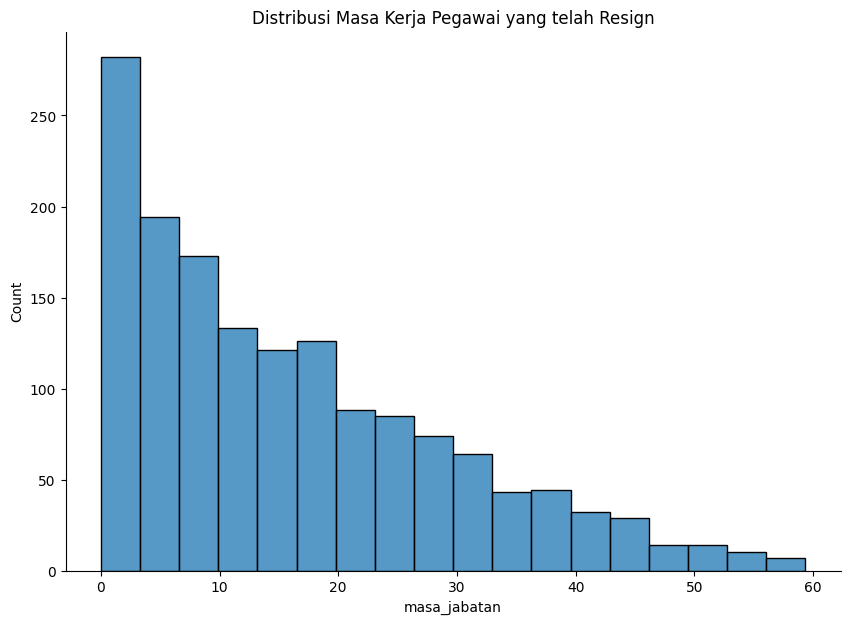

In [25]:
plt.figure(figsize=(10,7))
plt.title('Distribusi Masa Kerja Pegawai yang telah Resign')
sns.histplot(masa_jabatan['masa_jabatan'])
sns.despine()
plt.show()

In [32]:
# Select only rows where ExitDate is null
YangMasihKerja_df = merged_df[merged_df['ExitDate'].isnull()]



In [38]:
# Calculate the difference in months (assuming exit_date_max and StartDate are in timestamp format)
YangMasihKerja_df.loc['masa_jabatan_now'] = (exit_date_max - start_date_max).days / 30

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


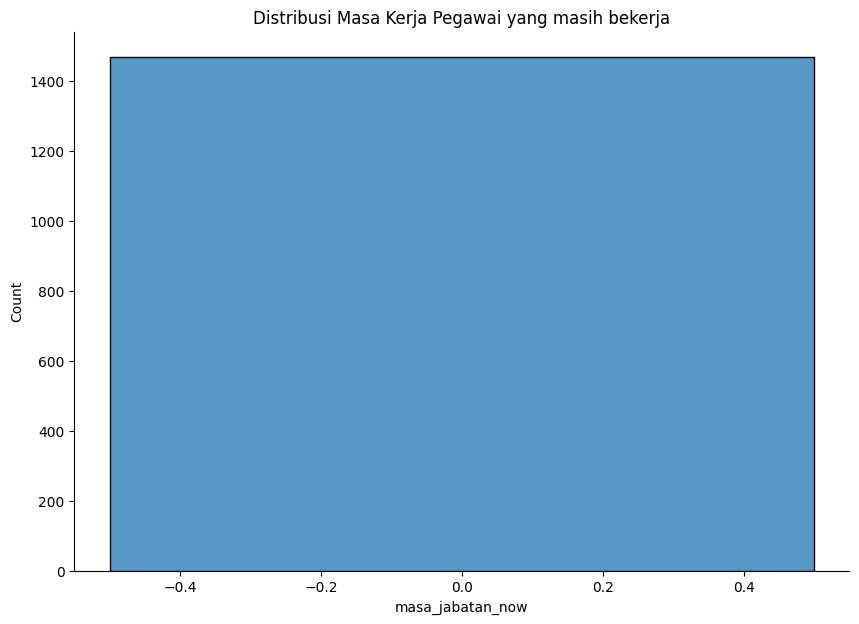

In [39]:
plt.figure(figsize=(10,7))
plt.title('Distribusi Masa Kerja Pegawai yang masih bekerja')
sns.histplot(YangMasihKerja_df['masa_jabatan_now'])
sns.despine()
plt.show()

Prediction on resignation

In [40]:
B = employee_data[['EmpID']].merge(survey_data, how='left', left_on='EmpID', right_on='Employee ID')
B

,EmpID,Employee ID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score
0,3427,3427,14-01-2023,1,2,3
1,3428,3428,09-09-2022,2,1,5
2,3429,3429,27-05-2023,1,2,1
3,3430,3430,16-06-2023,5,5,4
4,3431,3431,25-11-2022,2,5,3
...,...,...,...,...,...,...
2995,3422,3422,08-06-2023,1,1,3
2996,3423,3423,19-09-2022,4,5,3
2997,3424,3424,14-03-2023,2,4,5
2998,3425,3425,25-12-2022,5,2,3


In [41]:
prediction = B.drop(['Employee ID', 'Survey Date'], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

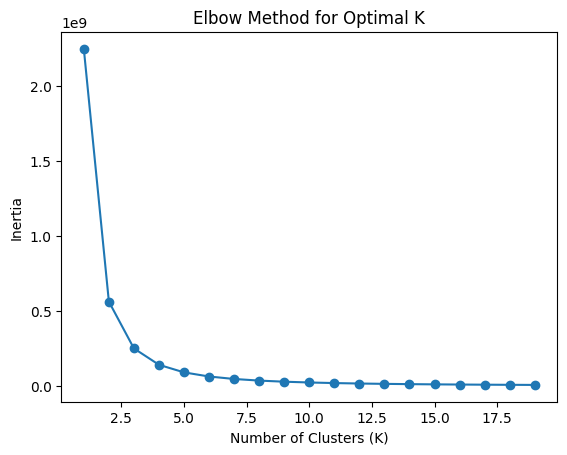

In [42]:
from sklearn.cluster import KMeans

# Define a range of K values to test
k_values = range(1, 20)

# Calculate the sum of squared distances for each K
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(prediction)  # X is our data frame
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Amount of cluster based on curve is 3

Let's cluster the employee ID based on: 1. Engagement, 2. Satisfaction, and 3. Work Life Balance

In [43]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(prediction)
cluster_labels = kmeans.labels_
prediction['Cluster'] = cluster_labels
prediction

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

,EmpID,Engagement Score,Satisfaction Score,Work-Life Balance Score,Cluster
0,3427,1,2,3,1
1,3428,2,1,5,1
2,3429,1,2,1,1
3,3430,5,5,4,1
4,3431,2,5,3,1
...,...,...,...,...,...
2995,3422,1,1,3,1
2996,3423,4,5,3,1
2997,3424,2,4,5,1
2998,3425,5,2,3,1


<Axes: >

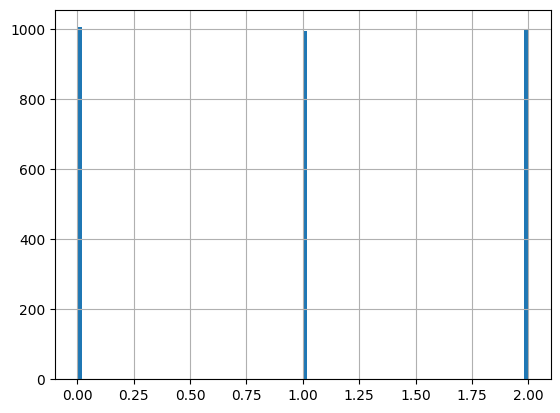

In [44]:
prediction["Cluster"].hist(bins = 100)

In [45]:
#Delete the white space for department type
employee_data['DepartmentType'] = employee_data['DepartmentType'].str.rstrip()

# Delete the white space for title
employee_data['Title'] = employee_data['Title'].str.rstrip()

In [46]:
employee_data['active'] = employee_data['ExitDate'].isna()
employee_data['active'] = employee_data['active'].astype(int)

In [47]:
employee_data.columns

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating', 'active'],
      dtype='object')

In [48]:
c = pd.merge(employee_data, survey_data, left_on='EmpID', right_on='Employee ID', how='left')
c = c[['EmpID', 'active'] + list(survey_data.columns)]
c

,EmpID,active,Employee ID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score
0,3427,1,3427,14-01-2023,1,2,3
1,3428,1,3428,09-09-2022,2,1,5
2,3429,1,3429,27-05-2023,1,2,1
3,3430,1,3430,16-06-2023,5,5,4
4,3431,1,3431,25-11-2022,2,5,3
...,...,...,...,...,...,...,...
2995,3422,0,3422,08-06-2023,1,1,3
2996,3423,1,3423,19-09-2022,4,5,3
2997,3424,0,3424,14-03-2023,2,4,5
2998,3425,0,3425,25-12-2022,5,2,3


In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model on training data
X_train = c[['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']]
y_train = c['active']
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

LogisticRegression()

In [50]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = ['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']

# Print the coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

Engagement Score: 0.0003976569520906013
Satisfaction Score: 0.012862075185186174
Work-Life Balance Score: 0.038017121434213624


In [51]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the testing set
X_test = c[['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']]
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(c['active'], y_pred)
report = classification_report(c['active'], y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.5053333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.73      0.60      1533
           1       0.49      0.27      0.35      1467

    accuracy                           0.51      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.50      0.51      0.48      3000



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

In [52]:
# Inputing coefficient in each employee ID to measure the opportunity of employee retention
c['prediction_score'] = (c['Engagement Score'] * 0.04 +
                              c['Satisfaction Score'] * 1.28 +
                              c['Work-Life Balance Score'] * 3.8)

In [53]:
final_prediction = c
final_prediction

,EmpID,active,Employee ID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,prediction_score
0,3427,1,3427,14-01-2023,1,2,3,14.00
1,3428,1,3428,09-09-2022,2,1,5,20.36
2,3429,1,3429,27-05-2023,1,2,1,6.40
3,3430,1,3430,16-06-2023,5,5,4,21.80
4,3431,1,3431,25-11-2022,2,5,3,17.88
...,...,...,...,...,...,...,...,...
2995,3422,0,3422,08-06-2023,1,1,3,12.72
2996,3423,1,3423,19-09-2022,4,5,3,17.96
2997,3424,0,3424,14-03-2023,2,4,5,24.20
2998,3425,0,3425,25-12-2022,5,2,3,14.16


The table above might confusing, therefore, let's put the prediction score using score 1-100

In [54]:
import pandas as pd

# Min-Max Scaling to describe percentage of retention probability
min_value = 0
max_value = 100

# Calculate the min-max scaled values for 'prediction_score'
final_prediction['prediction_score'] = ((final_prediction['prediction_score'] - final_prediction['prediction_score'].min()) /
                                        (final_prediction['prediction_score'].max() - final_prediction['prediction_score'].min())) * (max_value - min_value) + min_value

# Selecting the 'EmpID' column and dropping the rest
final_prediction = final_prediction[['EmpID', 'prediction_score']]

final_prediction

,EmpID,prediction_score
0,3427,43.359375
1,3428,74.414062
2,3429,6.250000
3,3430,81.445312
4,3431,62.304687
...,...,...
2995,3422,37.109375
2996,3423,62.695312
2997,3424,93.164062
2998,3425,44.140625


Now, every employee ID is scored using the prediction model on their resignation. Now, the HR could prevent the high score by perhaps, treat them differently, or start looking and enrich the talent pool for those who are predicted to resign.